# NPZ File Reader and Visualizer

This notebook helps you load and visualize the NPZ files created by data_builder.py

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import glob
from pathlib import Path

## 1. Set the path to your NPZ files

In [2]:
# Path to the directory containing NPZ files
npz_dir = "/Volumes/CHOO'S SSD/LINK/1. 박진봉 교수님 데이터/epilepsy_data"

# Check if directory exists
if os.path.exists(npz_dir):
    print(f"✓ Directory found: {npz_dir}")
else:
    print(f"✗ Directory not found: {npz_dir}")

✓ Directory found: /Volumes/CHOO'S SSD/LINK/1. 박진봉 교수님 데이터/epilepsy_data


## 2. List all NPZ files

In [3]:
# Find all A_17 and B_17 files
a_files = sorted(glob.glob(os.path.join(npz_dir, "A_17_256_*.npz")))
b_files = sorted(glob.glob(os.path.join(npz_dir, "B_17_256_*.npz")))

print(f"Found {len(a_files)} A-017 files")
print(f"Found {len(b_files)} B-017 files")
print(f"Total: {len(a_files) + len(b_files)} files")

# Show first and last few files
if a_files:
    print(f"\nA-017 files range: {os.path.basename(a_files[0])} to {os.path.basename(a_files[-1])}")
if b_files:
    print(f"B-017 files range: {os.path.basename(b_files[0])} to {os.path.basename(b_files[-1])}")

Found 1010 A-017 files
Found 1010 B-017 files
Total: 2020 files

A-017 files range: A_17_256_0.npz to A_17_256_999.npz
B-017 files range: B_17_256_0.npz to B_17_256_999.npz


## 3. Load and inspect a single NPZ file

In [4]:
# Load the first A-017 file as an example
if a_files:
    sample_file = a_files[0]
    print(f"Loading: {os.path.basename(sample_file)}")
    
    # Load the NPZ file
    data = np.load(sample_file)
    
    # Show what's inside
    print(f"\nContents of the NPZ file:")
    for key in data.files:
        print(f"  - {key}: shape {data[key].shape}, dtype {data[key].dtype}")
    
    # Extract the arrays
    time = data['time']
    channel_data = data['A-017']
    
    print(f"\nData Summary:")
    print(f"  Duration: {time[-1] - time[0]:.2f} seconds")
    print(f"  Samples: {len(channel_data)}")
    print(f"  Sample rate: {len(channel_data) / (time[-1] - time[0]):.2f} Hz")
    print(f"  Data range: [{channel_data.min():.2f}, {channel_data.max():.2f}]")
    print(f"  Data mean: {channel_data.mean():.2f}")
    print(f"  Data std: {channel_data.std():.2f}")
else:
    print("No A-017 files found!")

Loading: A_17_256_0.npz

Contents of the NPZ file:
  - time: shape (7680,), dtype float64
  - A-017: shape (7680,), dtype float64

Data Summary:
  Duration: 30.00 seconds
  Samples: 7680
  Sample rate: 256.02 Hz
  Data range: [-162.48, 152.74]
  Data mean: -0.06
  Data std: 31.91


## 4. Visualize a single epoch

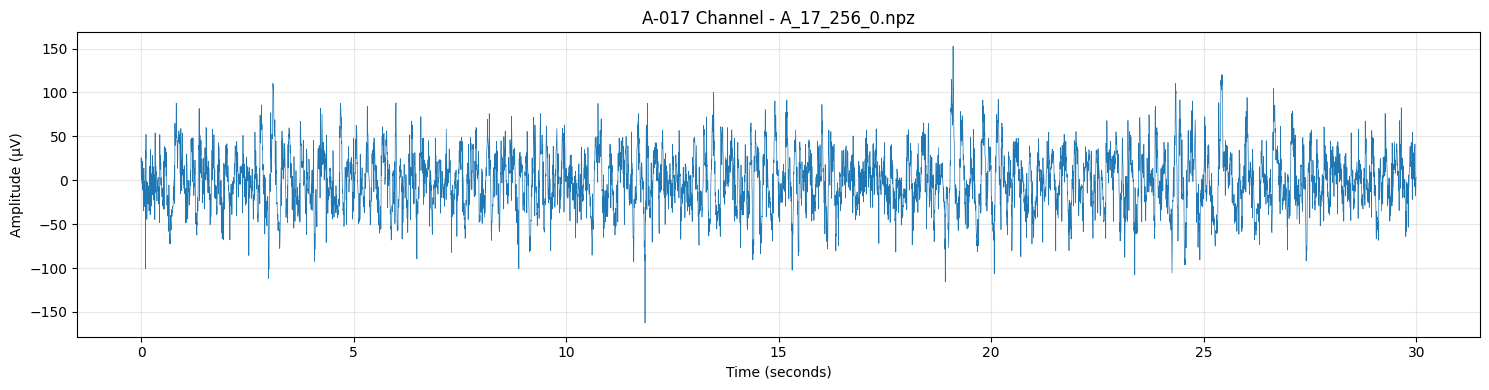

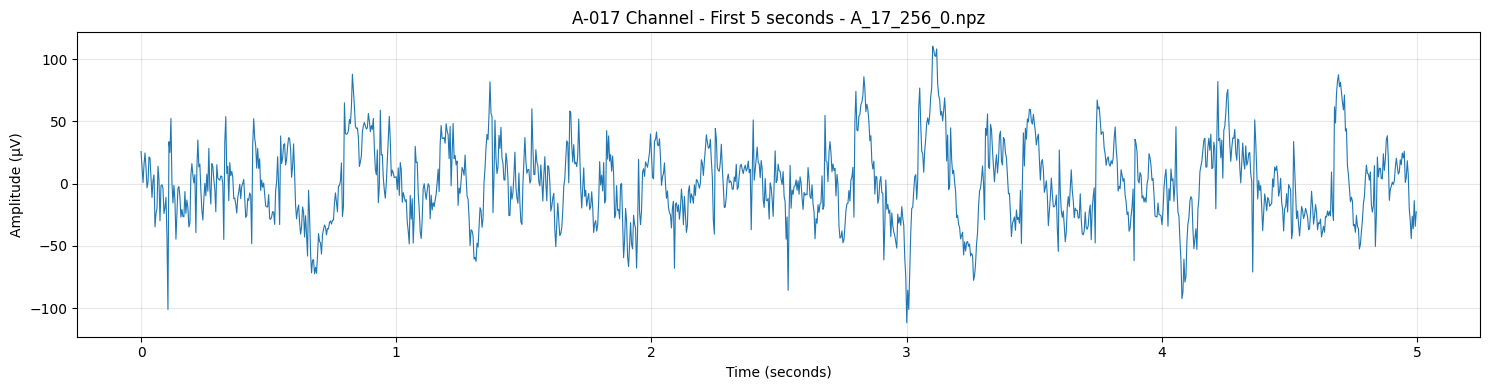

In [5]:
# Plot the data
if a_files:
    plt.figure(figsize=(15, 4))
    plt.plot(time, channel_data, linewidth=0.5)
    plt.xlabel('Time (seconds)')
    plt.ylabel('Amplitude (μV)')
    plt.title(f'A-017 Channel - {os.path.basename(sample_file)}')
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()
    
    # Show a zoomed-in view of the first 5 seconds
    plt.figure(figsize=(15, 4))
    mask = time <= 5.0
    plt.plot(time[mask], channel_data[mask], linewidth=0.8)
    plt.xlabel('Time (seconds)')
    plt.ylabel('Amplitude (μV)')
    plt.title(f'A-017 Channel - First 5 seconds - {os.path.basename(sample_file)}')
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

## 5. Compare A-017 and B-017 from the same file number

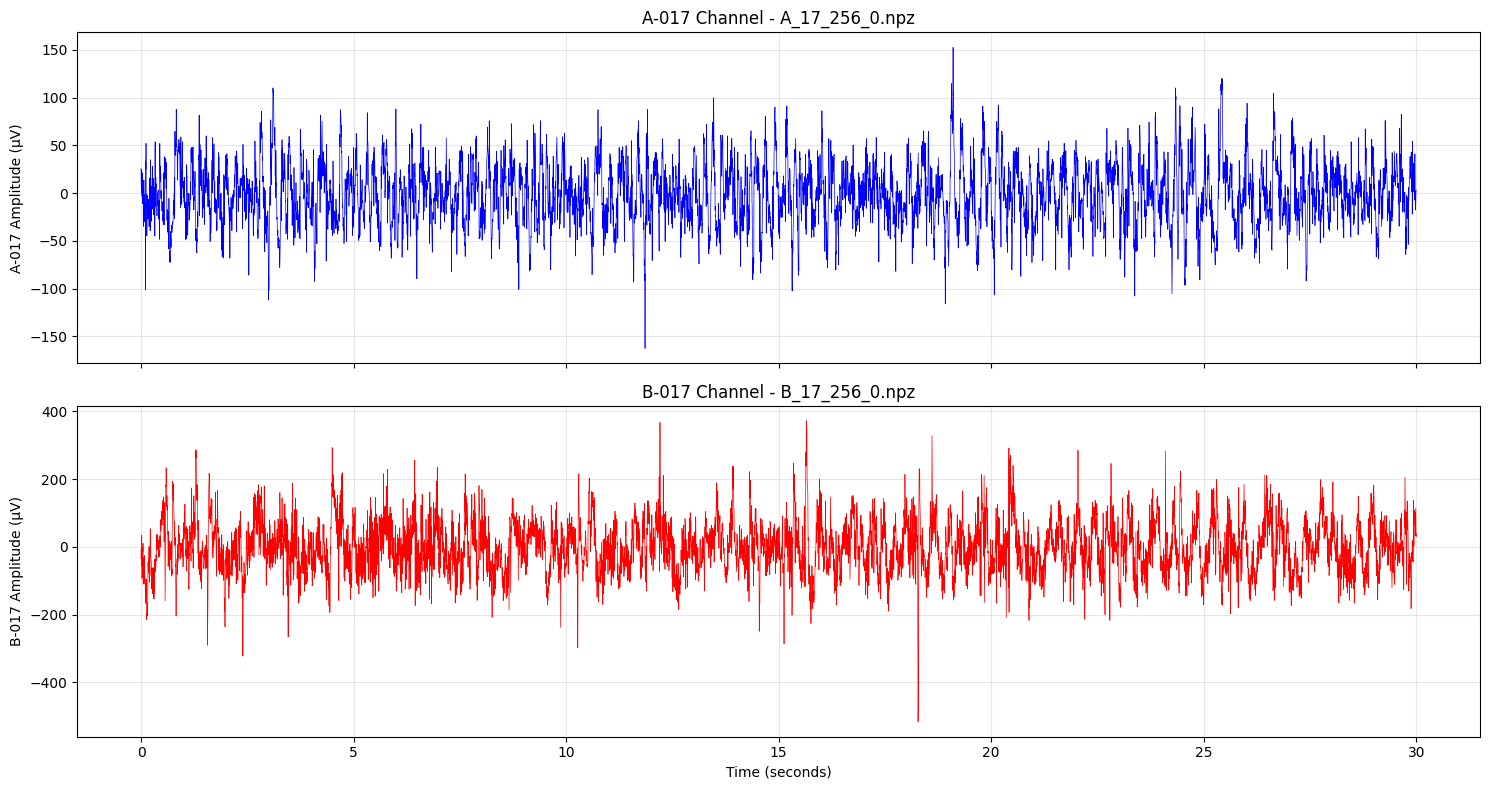

In [6]:
# Load corresponding A and B files
if a_files and b_files:
    # Load A-017
    a_data = np.load(a_files[0])
    a_time = a_data['time']
    a_channel = a_data['A-017']
    
    # Load B-017
    b_data = np.load(b_files[0])
    b_time = b_data['time']
    b_channel = b_data['B-017']
    
    # Plot both channels
    fig, axes = plt.subplots(2, 1, figsize=(15, 8), sharex=True)
    
    # A-017
    axes[0].plot(a_time, a_channel, linewidth=0.5, color='blue')
    axes[0].set_ylabel('A-017 Amplitude (μV)')
    axes[0].set_title(f'A-017 Channel - {os.path.basename(a_files[0])}')
    axes[0].grid(True, alpha=0.3)
    
    # B-017
    axes[1].plot(b_time, b_channel, linewidth=0.5, color='red')
    axes[1].set_xlabel('Time (seconds)')
    axes[1].set_ylabel('B-017 Amplitude (μV)')
    axes[1].set_title(f'B-017 Channel - {os.path.basename(b_files[0])}')
    axes[1].grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
else:
    print("Need both A-017 and B-017 files for comparison")

## 6. Load and visualize multiple epochs

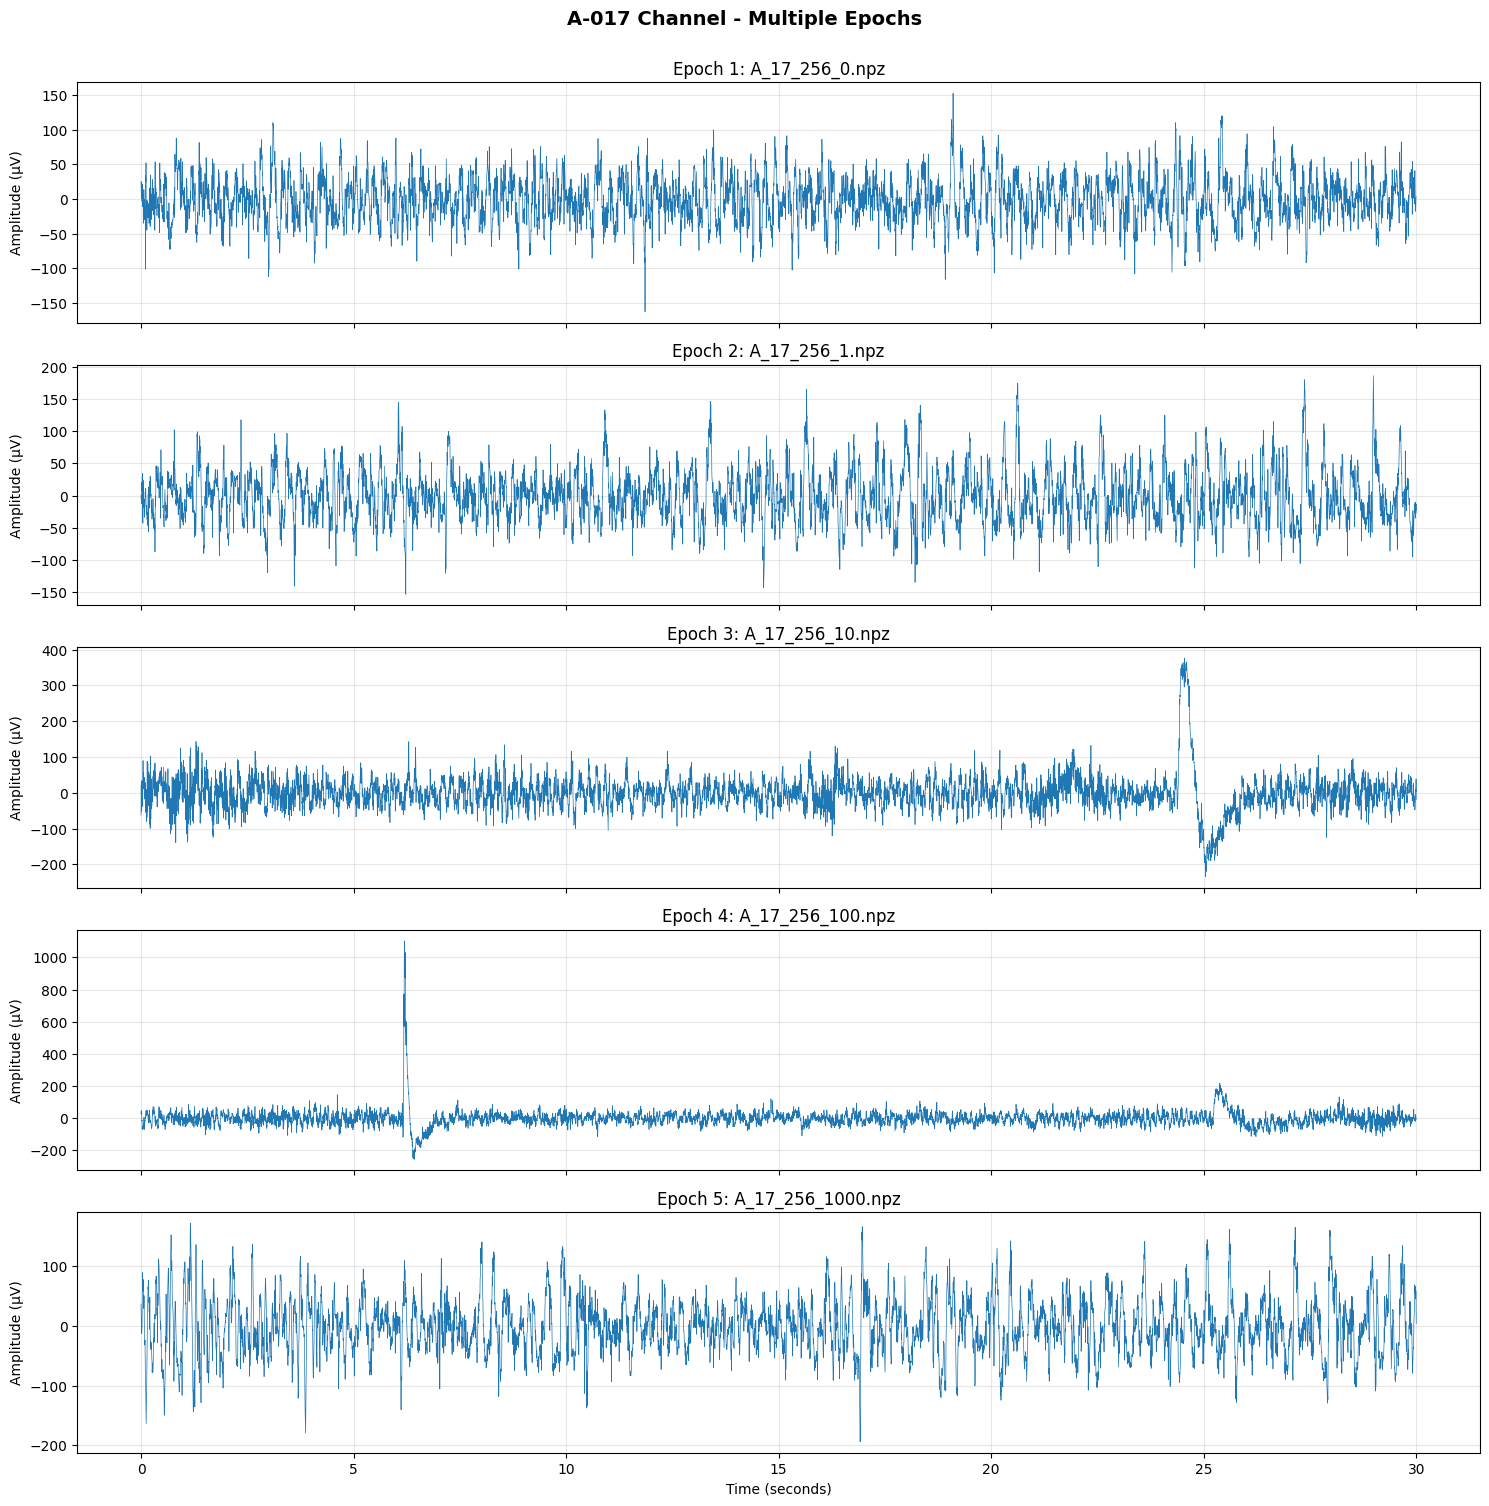

In [7]:
# Select how many epochs to visualize
num_epochs_to_plot = min(5, len(a_files))  # Plot first 5 epochs

if a_files:
    fig, axes = plt.subplots(num_epochs_to_plot, 1, figsize=(15, 3*num_epochs_to_plot), sharex=True)
    
    if num_epochs_to_plot == 1:
        axes = [axes]
    
    for i, file_path in enumerate(a_files[:num_epochs_to_plot]):
        data = np.load(file_path)
        time = data['time']
        channel = data['A-017']
        
        axes[i].plot(time, channel, linewidth=0.5)
        axes[i].set_ylabel('Amplitude (μV)')
        axes[i].set_title(f'Epoch {i+1}: {os.path.basename(file_path)}')
        axes[i].grid(True, alpha=0.3)
    
    axes[-1].set_xlabel('Time (seconds)')
    plt.suptitle('A-017 Channel - Multiple Epochs', y=1.001, fontsize=14, fontweight='bold')
    plt.tight_layout()
    plt.show()

## 7. Compute and visualize power spectrum

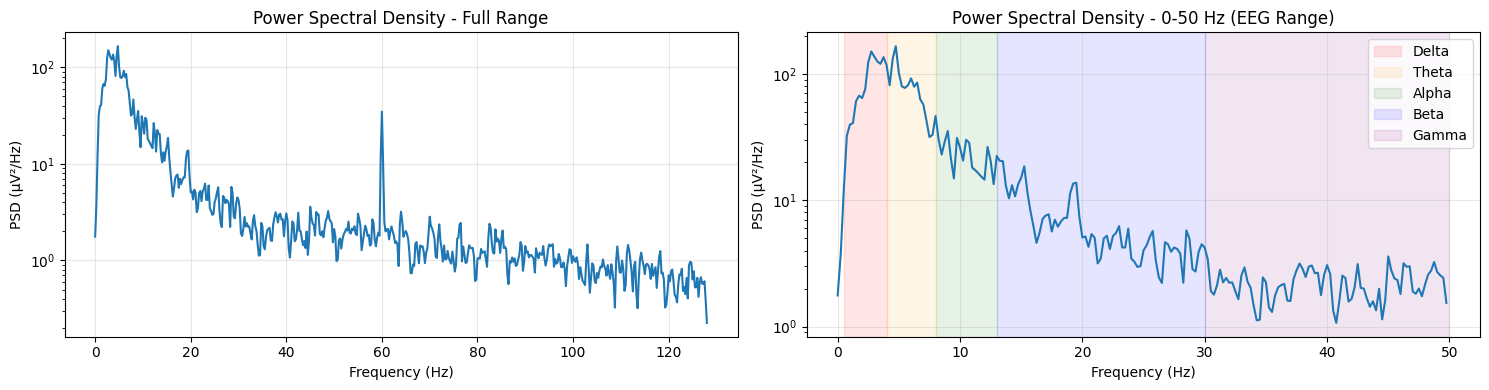

In [8]:
from scipy import signal

if a_files:
    # Load first epoch
    data = np.load(a_files[0])
    time_data = data['time']
    channel_data = data['A-017']
    
    # Calculate sample rate
    fs = len(channel_data) / (time_data[-1] - time_data[0])
    
    # Compute power spectral density
    frequencies, psd = signal.welch(channel_data, fs=fs, nperseg=min(1024, len(channel_data)))
    
    # Plot
    fig, axes = plt.subplots(1, 2, figsize=(15, 4))
    
    # Full spectrum
    axes[0].semilogy(frequencies, psd)
    axes[0].set_xlabel('Frequency (Hz)')
    axes[0].set_ylabel('PSD (μV²/Hz)')
    axes[0].set_title('Power Spectral Density - Full Range')
    axes[0].grid(True, alpha=0.3)
    
    # Zoomed to 0-50 Hz (typical EEG range)
    mask = frequencies <= 50
    axes[1].semilogy(frequencies[mask], psd[mask])
    axes[1].set_xlabel('Frequency (Hz)')
    axes[1].set_ylabel('PSD (μV²/Hz)')
    axes[1].set_title('Power Spectral Density - 0-50 Hz (EEG Range)')
    axes[1].grid(True, alpha=0.3)
    
    # Add frequency band markers
    bands = {'Delta': (0.5, 4), 'Theta': (4, 8), 'Alpha': (8, 13), 
             'Beta': (13, 30), 'Gamma': (30, 50)}
    colors = ['red', 'orange', 'green', 'blue', 'purple']
    
    for (band_name, (low, high)), color in zip(bands.items(), colors):
        axes[1].axvspan(low, high, alpha=0.1, color=color, label=band_name)
    
    axes[1].legend(loc='upper right')
    
    plt.tight_layout()
    plt.show()

## 8. Quick verification function

In [9]:
def verify_npz_file(file_path):
    """
    Verify that an NPZ file has the expected structure and properties.
    """
    try:
        data = np.load(file_path)
        
        # Check required keys
        if 'time' not in data.files:
            return False, "Missing 'time' array"
        
        has_a017 = 'A-017' in data.files
        has_b017 = 'B-017' in data.files
        
        if not (has_a017 or has_b017):
            return False, "Missing channel data (A-017 or B-017)"
        
        # Get the channel data
        time = data['time']
        channel_key = 'A-017' if has_a017 else 'B-017'
        channel_data = data[channel_key]
        
        # Check shapes match
        if len(time) != len(channel_data):
            return False, f"Shape mismatch: time={len(time)}, channel={len(channel_data)}"
        
        # Check duration (should be ~30 seconds)
        duration = time[-1] - time[0]
        if not (29.5 <= duration <= 30.5):
            return False, f"Unexpected duration: {duration:.2f} seconds (expected ~30s)"
        
        # Check sample rate (should be ~256 Hz)
        sample_rate = len(time) / duration
        if not (250 <= sample_rate <= 260):
            return False, f"Unexpected sample rate: {sample_rate:.2f} Hz (expected ~256 Hz)"
        
        return True, f"OK - {channel_key}, {duration:.2f}s, {sample_rate:.2f} Hz, {len(channel_data)} samples"
        
    except Exception as e:
        return False, f"Error loading file: {str(e)}"

# Test verification on a few files
print("Verifying NPZ files...\n")
test_files = (a_files[:3] + b_files[:3]) if (a_files and b_files) else (a_files[:5] if a_files else b_files[:5])

for file_path in test_files:
    is_valid, message = verify_npz_file(file_path)
    status = "✓" if is_valid else "✗"
    print(f"{status} {os.path.basename(file_path)}: {message}")

Verifying NPZ files...

✓ A_17_256_0.npz: OK - A-017, 30.00s, 256.02 Hz, 7680 samples
✓ A_17_256_1.npz: OK - A-017, 30.00s, 256.02 Hz, 7680 samples
✓ A_17_256_10.npz: OK - A-017, 30.00s, 256.02 Hz, 7680 samples
✓ B_17_256_0.npz: OK - B-017, 30.00s, 256.02 Hz, 7680 samples
✓ B_17_256_1.npz: OK - B-017, 30.00s, 256.02 Hz, 7680 samples
✓ B_17_256_10.npz: OK - B-017, 30.00s, 256.02 Hz, 7680 samples


## 9. Load a specific file by number

Loading: A_17_256_932.npz


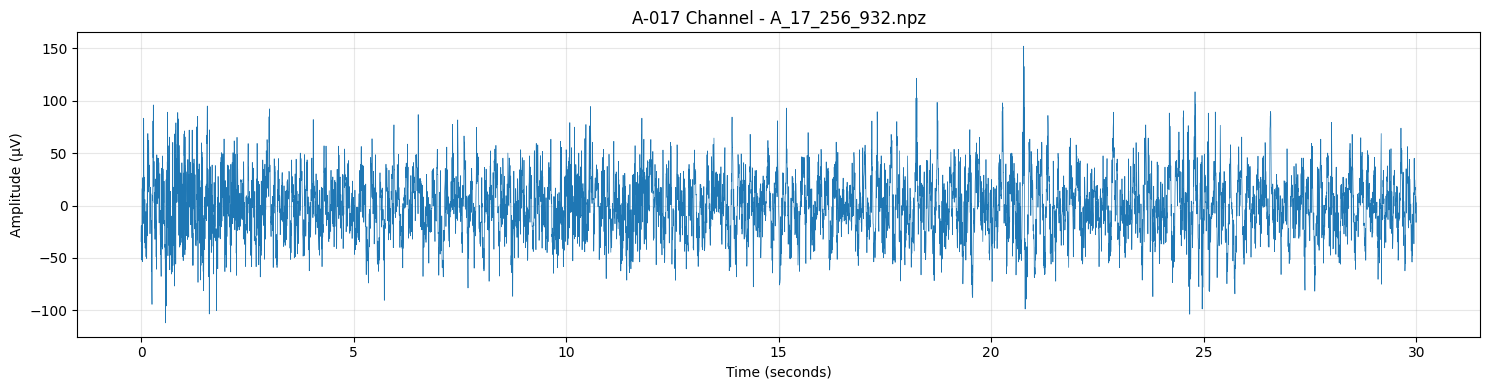


File info:
  Duration: 30.00 seconds
  Samples: 7680
  Sample rate: 256.02 Hz


In [10]:
# Specify the file number you want to load
file_number = 932  # Change this to the file number you want to view
channel = 'A'  # 'A' for A-017 or 'B' for B-017

# Construct the filename
if channel == 'A':
    filename = f"A_17_256_{file_number}.npz"
else:
    filename = f"B_17_256_{file_number}.npz"

file_path = os.path.join(npz_dir, filename)

if os.path.exists(file_path):
    print(f"Loading: {filename}")
    data = np.load(file_path)
    time = data['time']
    channel_key = f"{channel}-017"
    channel_data = data[channel_key]
    
    # Plot
    plt.figure(figsize=(15, 4))
    plt.plot(time, channel_data, linewidth=0.5)
    plt.xlabel('Time (seconds)')
    plt.ylabel('Amplitude (μV)')
    plt.title(f'{channel_key} Channel - {filename}')
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()
    
    print(f"\nFile info:")
    print(f"  Duration: {time[-1]:.2f} seconds")
    print(f"  Samples: {len(channel_data)}")
    print(f"  Sample rate: {len(channel_data) / time[-1]:.2f} Hz")
else:
    print(f"File not found: {file_path}")

## 10. Statistics across all files

In [11]:
# Compute statistics across all A-017 files
if a_files:
    print("Computing statistics across all A-017 files...\n")
    
    durations = []
    sample_counts = []
    means = []
    stds = []
    
    for file_path in a_files[:100]:  # Sample first 100 files to avoid long computation
        data = np.load(file_path)
        time = data['time']
        channel = data['A-017']
        
        durations.append(time[-1] - time[0])
        sample_counts.append(len(channel))
        means.append(channel.mean())
        stds.append(channel.std())
    
    print(f"Statistics from {len(durations)} files:")
    print(f"\nDuration:")
    print(f"  Mean: {np.mean(durations):.3f} ± {np.std(durations):.3f} seconds")
    print(f"  Range: [{np.min(durations):.3f}, {np.max(durations):.3f}] seconds")
    
    print(f"\nSample count:")
    print(f"  Mean: {np.mean(sample_counts):.1f} ± {np.std(sample_counts):.1f}")
    print(f"  Range: [{np.min(sample_counts)}, {np.max(sample_counts)}]")
    
    print(f"\nSignal amplitude:")
    print(f"  Mean across files: {np.mean(means):.2f} ± {np.std(means):.2f} μV")
    print(f"  Std across files: {np.mean(stds):.2f} ± {np.std(stds):.2f} μV")

Computing statistics across all A-017 files...

Statistics from 100 files:

Duration:
  Mean: 29.998 ± 0.000 seconds
  Range: [29.998, 29.998] seconds

Sample count:
  Mean: 7680.0 ± 0.0
  Range: [7680, 7680]

Signal amplitude:
  Mean across files: -0.10 ± 0.11 μV
  Std across files: 42.17 ± 14.36 μV
